<a href="https://colab.research.google.com/github/maanpooja/hello-world/blob/master/Identify_Biding_Robots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def getZipFromDrive(fileId):
    # Install the PyDrive wrapper & import libraries.
    # This only needs to be done once per notebook.
    !pip install -U -q PyDrive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from io import BytesIO
    import zipfile
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    # Authenticate and create the PyDrive client.
    # This only needs to be done once per notebook.
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Download a file based on its file ID.
    #
    # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
    # Music " 1p90klezsnQnleQdAZMgkGAf0ZHWepE3s "
    #https://drive.google.com/open?id=1SDCCiys0KlzlzBWw6ttEIFV8NKKJCm04
    print("Downloading...")
    downloaded = drive.CreateFile({'id': fileId})

    toUnzipStringContent = downloaded.GetContentString(encoding='cp862')
    toUnzipBytesContent = BytesIO(toUnzipStringContent.encode('cp862'))
    readZipfile = zipfile.ZipFile(toUnzipBytesContent, "r")
    readZipfile.extractall()

getZipFromDrive("1atNqwWLfwd-sZ4vFjfi1gNzbcKiJ_I5G")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Downloading...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("bids.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("Bid Data: ", data.shape)
print("Train Data: ", train.shape)
print("Test Data: ", test.shape)

Bid Data:  (7656334, 9)
Train Data:  (2013, 4)
Test Data:  (4700, 3)


In [ ]:
data.info()
# data = data[:3256334]
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [ ]:
train.head(1)

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0


In [ ]:
test.head(3)

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
bidder_id          4700 non-null object
payment_account    4700 non-null object
address            4700 non-null object
dtypes: object(3)
memory usage: 110.3+ KB


In [ ]:
print(data['bidder_id'].nunique())
print(train['bidder_id'].nunique())
print(test['bidder_id'].nunique())

6614
2013
4700


**----------------------------------------------------------**

 Number of Auction   



In [ ]:
dataIdList =  data['bidder_id'].unique()
groupedData = data[['bidder_id','auction']].groupby('bidder_id').count()['auction']
def numberofActions(line,dataGrouped,dataid):
  if not line['bidder_id'] in dataid:
    return 0
  else:
    return dataGrouped[line['bidder_id']]

train['nbActions'] = train.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)
test['nbActions'] = test.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)

In [ ]:
train.head()

,bidder_id,payment_account,address,outcome,nbActions
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155


**------------------------------------------------------**
    
   RESPONSE TIME ON THE BASE OF LAST AUCTION TIME



In [ ]:
## RESPONSE TIME ON THE BASE OF LAST AUCTION TIME
lastActionDict={}

def timeResponse(line,lastActionDict):
    if line['auction'] in lastActionDict:
        time = line['time'] - lastActionDict[line['auction']]
        lastActionDict[line['auction']] = line['time']
        return time
    else :
        lastActionDict[line['auction']] = line['time']
        return 0

data['timeresponse'] = data.apply(lambda x: timeResponse(x,lastActionDict),axis=1)

In [ ]:
len(lastActionDict)

15051

In [ ]:
data.tail(5)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,timeresponse
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug,19631578947
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn,473684210
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa,52631578
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl,17000000000
7656333,7656333,0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,c9ox9,mobile,phone82,9709222052631578,jo,160.243.101.60,vasstdc27m7nks3,10368421052


In [ ]:
## MINIMUM, MAXIMUM AND MEAN TIME RESPONSE OF EACH BIDDER(TRAIN DATASET)

groupedData = data[['bidder_id','timeresponse']].groupby('bidder_id').mean()['timeresponse']
def meanTimeResponse(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['meanTimeResponse'] = train.apply(lambda x: meanTimeResponse(x,groupedData,dataIdList),axis=1)
test['meanTimeResponse'] = test.apply(lambda x: meanTimeResponse(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','timeresponse']].groupby('bidder_id').min()['timeresponse']
def minTimeResponse(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['minTimeResponse'] = train.apply(lambda x: minTimeResponse(x,groupedData,dataIdList),axis=1)
test['minTimeResponse'] = test.apply(lambda x: minTimeResponse(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','timeresponse']].groupby('bidder_id').max()['timeresponse']
def maxTimeResponse(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['maxTimeResponse'] = train.apply(lambda x: maxTimeResponse(x,groupedData,dataIdList),axis=1)
test['maxTimeResponse'] = test.apply(lambda x: maxTimeResponse(x,groupedData,dataIdList),axis=1)

In [ ]:
train.head()

,bidder_id,payment_account,address,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24,5.617566e+11,0,4043842105263
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3,1.228070e+08,0,315789473
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4,1.152632e+10,4157894737,17473684210
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1,1.736842e+10,17368421052,17368421052
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155,1.853990e+09,0,121052631579


**------------------------------------------------------**


   NUMBER OF BIDS BEFORE THE ACTION OF USER ON AUCTION



In [ ]:
## NUMBER OF BIDS BEFORE THE ACTION OF USER ON AUCTION

lastActionDict={}

def bidValue(line,lastActionDict):
    if line['auction'] in lastActionDict:
        lastActionDict[line['auction']] += 1
    else :
        lastActionDict[line['auction']] = 1
    return lastActionDict[line['auction']]

data['bidValue'] = data.apply(lambda x: bidValue(x,lastActionDict),axis=1)

In [ ]:
data.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,timeresponse,bidValue
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0,1
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,0,1
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,0,1
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,0,1
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,0,2


In [ ]:
groupedData = data[['bidder_id','bidValue']].groupby('bidder_id').mean()['bidValue']
def meanbidValue(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['meanBidValue'] = train.apply(lambda x: meanbidValue(x,groupedData,dataIdList),axis=1)
test['meanBidValue'] = test.apply(lambda x: meanbidValue(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','bidValue']].groupby('bidder_id').min()['bidValue']
def minbidValue(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['minBidValue'] = train.apply(lambda x: minbidValue(x,groupedData,dataIdList),axis=1)
test['minBidValue'] = test.apply(lambda x: minbidValue(x,groupedData,dataIdList),axis=1)

groupedData = data[['bidder_id','bidValue']].groupby('bidder_id').max()['bidValue']
def maxbidValue(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['maxBidValue'] = train.apply(lambda x: maxbidValue(x,groupedData,dataIdList),axis=1)
test['maxBidValue'] = test.apply(lambda x: maxbidValue(x,groupedData,dataIdList),axis=1)

In [ ]:
train.head()

,bidder_id,payment_account,address,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24,5.617566e+11,0,4043842105263,1411.541667,5,15400
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3,1.228070e+08,0,315789473,109955.000000,73166,162744
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4,1.152632e+10,4157894737,17473684210,616.000000,396,1112
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1,1.736842e+10,17368421052,17368421052,1395.000000,1395,1395
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155,1.853990e+09,0,121052631579,3619.522581,4,27471


**--------------------------------------------------------**

   NUMBER OF BIDS BEFORE THE ACTION OF USER ON AUCTION



In [ ]:
## NUMBER OF AUCTION PLAYED (EACH BIDDER )

dataUnique = data[['bidder_id','auction']].drop_duplicates()
groupedData = dataUnique.groupby('bidder_id').count()['auction']

def numberofAuctions(line,dataGrouped,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return dataGrouped[line['bidder_id']]

train['nbAuctionsPlayed'] = train.apply(lambda x: numberofAuctions(x,groupedData,dataIdList),axis=1)
test['nbAuctionsPlayed'] = test.apply(lambda x: numberofAuctions(x,groupedData,dataIdList),axis=1)

In [ ]:
train.head()

,bidder_id,payment_account,address,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue,nbAuctionsPlayed
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24,5.617566e+11,0,4043842105263,1411.541667,5,15400,18
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3,1.228070e+08,0,315789473,109955.000000,73166,162744,1
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4,1.152632e+10,4157894737,17473684210,616.000000,396,1112,4
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1,1.736842e+10,17368421052,17368421052,1395.000000,1395,1395,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155,1.853990e+09,0,121052631579,3619.522581,4,27471,23


In [ ]:
def last(line,lastActionDict):
    if line['bidValue'] == lastActionDict[line['auction']] :
        return True
    else :
        return False

data['end'] = data.apply(lambda x: last(x,lastActionDict),axis=1)

In [ ]:
data.end.value_counts()

False    7641283
True       15051
Name: end, dtype: int64

In [ ]:
winner = data[data['end']].groupby('bidder_id').count()['auction']

def nbOfAuctionWon(line,winner):
    if not line['bidder_id'] in winner:
        return 0
    else:
        return winner[line['bidder_id']]

train['nbOfAuctionWon'] = train.apply(lambda x: nbOfAuctionWon(x,winner),axis=1)
test['nbOfAuctionWon'] = test.apply(lambda x: nbOfAuctionWon(x,winner),axis=1)

In [ ]:
# x = data[data['end']].groupby('bidder_id').count()
# x.head()

In [ ]:
train.head(5)

,bidder_id,payment_account,address,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue,nbAuctionsPlayed,nbOfAuctionWon
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24,5.617566e+11,0,4043842105263,1411.541667,5,15400,18,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3,1.228070e+08,0,315789473,109955.000000,73166,162744,1,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4,1.152632e+10,4157894737,17473684210,616.000000,396,1112,4,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1,1.736842e+10,17368421052,17368421052,1395.000000,1395,1395,1,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155,1.853990e+09,0,121052631579,3619.522581,4,27471,23,0


**--------------------------------------------------------**


   Number of IP, country, url



In [ ]:
nboftriple = data[['bidder_id','ip','country','url']].drop_duplicates().groupby('bidder_id').count()['ip']

def nbOfTriple(line,nboftriple):
    if not line['bidder_id'] in nboftriple:
        return 0
    else:
        return nboftriple[line['bidder_id']]

train['nbOfTriple'] = train.apply(lambda x: nbOfTriple(x,nboftriple),axis=1)
test['nbOfTriple'] = test.apply(lambda x: nbOfTriple(x,nboftriple),axis=1)

In [ ]:
print(train.shape)
train.head()

(2013, 14)


,bidder_id,payment_account,address,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue,nbAuctionsPlayed,nbOfAuctionWon,nbOfTriple
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24,5.617566e+11,0,4043842105263,1411.541667,5,15400,18,0,20
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3,1.228070e+08,0,315789473,109955.000000,73166,162744,1,0,3
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4,1.152632e+10,4157894737,17473684210,616.000000,396,1112,4,0,4
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1,1.736842e+10,17368421052,17368421052,1395.000000,1395,1395,1,0,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155,1.853990e+09,0,121052631579,3619.522581,4,27471,23,0,134


In [ ]:
data.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,timeresponse,bidValue,end
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0,1,False
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,0,1,False
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,0,1,False
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,0,1,False
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,0,2,False


In [ ]:
print(data.shape)
data.info()

(7656334, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 12 columns):
bid_id          int64
bidder_id       object
auction         object
merchandise     object
device          object
time            int64
country         object
ip              object
url             object
timeresponse    int64
bidValue        int64
end             bool
dtypes: bool(1), int64(4), object(7)
memory usage: 649.8+ MB


**Time Series**

In [ ]:
time = data['time'].unique()
time.sort()
pas = int(np.floor((time[-1]-time[0])/8000)-1)

def calculateTime(line,time,pas):
    return (line['time'] - time[0])// pas

data['timeSteps'] = data.apply(lambda x: calculateTime(x,time,pas),axis=1)

In [ ]:
print(data.shape)
print(data.info())
data.head()

(7656334, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 13 columns):
bid_id          int64
bidder_id       object
auction         object
merchandise     object
device          object
time            int64
country         object
ip              object
url             object
timeresponse    int64
bidValue        int64
end             bool
timeSteps       int64
dtypes: bool(1), int64(5), object(7)
memory usage: 708.3+ MB
None


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,timeresponse,bidValue,end,timeSteps
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0,1,False,7225
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,0,1,False,7225
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,0,1,False,7225
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,0,1,False,7225
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,0,2,False,7225


In [ ]:
train.shape

(2013, 14)

In [ ]:
data.memory_usage()
# data.memory_usage(index=True).sum()

Index                128
bid_id          61250672
bidder_id       61250672
auction         61250672
merchandise     61250672
device          61250672
time            61250672
country         61250672
ip              61250672
url             61250672
timeresponse    61250672
bidValue        61250672
end              7656334
timeSteps       61250672
dtype: int64

------

In [ ]:
# ####EDIT #############
# def MyFunc(data):
#   data_time_series2 = data.unstack()
# #tesing1 = testing.pivot_table(values = 'auction', index = ['bidder_id'], columns = ['timeSteps'], aggfunc = lambda x: len(x.unique()),  fill_value=0)
#   data_time_series2 = data_time_series2.fillna(0)
#   return data_time_series2

In [ ]:
# # columns=['bidder_id','timeSteps','auction']
# data1 = data[['bidder_id','timeSteps','auction']].groupby(['bidder_id','timeSteps']).count()['auction']
# total = len(data1)
# BATCHSIZE = 10000 ##
# rng = total // BATCHSIZE
# ii = 0
# arr = []
# for i in range(rng):
#   start = ii
#   end = ii + BATCHSIZE
#   passMe = data1[start:end]
#   arr.append(MyFunc(passMe))
#   ii = BATCHSIZE


In [ ]:
# df = pd.concat(arr)
# print(df.head())
# df.shape

In [ ]:
# data_time_series2 = df

-----

In [ ]:
data_time_series2 = data[['bidder_id','timeSteps','auction']].groupby(['bidder_id','timeSteps']).count()['auction'].unstack()
#tesing1 = testing.pivot_table(values = 'auction', index = ['bidder_id'], columns = ['timeSteps'], aggfunc = lambda x: len(x.unique()),  fill_value=0)
data_time_series2 = data_time_series2.fillna(0)
data_time_series2.head(5)

timeSteps,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7961,7962,7963,7964,7965,7966,7967,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999,8000
bidder_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002d229ffb247009810828f648afc2ef593rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0030a2dd87ad2733e0873062e4f83954mkj86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00486a11dff552c4bd7696265724ff81yeo9v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
time_Series = data_time_series2.columns
times_Series1 = time_Series[time_Series<=1000]
times_Series2 = time_Series[time_Series>1000]
times_Series21 = times_Series2[times_Series2<=6000]
times_Series22 = times_Series2[times_Series2>6000]

print(times_Series1[0] ,times_Series1[-1] , times_Series1.shape)
print(times_Series21[0] ,times_Series21[-1] , times_Series21.shape)
print(times_Series22[0] ,times_Series22[-1] , times_Series22.shape)

0 774 (775,)
3612 4387 (776,)
7225 8000 (776,)


In [ ]:
time_group1 = data_time_series2.ix[:,0:775]
time_group2 = data_time_series2.ix[:,3612:4387]
time_group3 = data_time_series2.ix[:,7225:8000]
time_group2.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-depr

timeSteps,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,...,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4376,4377,4378,4379,4380,4381,4382,4383,4384,4385,4386,4387
bidder_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002d229ffb247009810828f648afc2ef593rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0030a2dd87ad2733e0873062e4f83954mkj86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00486a11dff552c4bd7696265724ff81yeo9v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# import numpy as np
# import matplotlib.pyplot as plt
# import mlpy.wavelet as wave
# x = time_group1.ix[u'3d7cff3dedd8a8e02dbc551c6a61da3bibbvh']
# scales = wave.autoscales(N=x.shape[0], dt=1, dj=0.25, wf='dog', p=2)
# X = wave.cwt(x=x, dt=1, scales=scales, wf='dog', p=2)
# fig = plt.figure(1)
# ax1 = plt.subplot(2,1,1)
# p1 = ax1.plot(x)
# ax1.autoscale_view(tight=True)
# ax2 = plt.subplot(2,1,2)
# p2 = ax2.imshow(np.abs(X), interpolation='nearest',aspect='auto')
# plt.show()
# x = time_group3.ix[u'585e7c21b80baf2225224fe140cdb1a73ddrf']
# scales = wave.autoscales(N=x.shape[0], dt=1, dj=0.25, wf='dog', p=2)
# X = wave.cwt(x=x, dt=1, scales=scales, wf='dog', p=2)
# fig = plt.figure(1)
# ax1 = plt.subplot(2,1,1)
# p1 = ax1.plot(x)
# ax1.autoscale_view(tight=True)
# ax2 = plt.subplot(2,1,2)
# p2 = ax2.imshow(np.abs(X), interpolation='nearest',aspect='auto')
# plt.show()


In [ ]:
import pywt as pywt

def extractRMSVWavelet(signal,waveFamily):

  C = pywt.wavedec(signal,waveFamily,mode='sym',level=5)
  RMS = np.array([np.sqrt(np.linalg.norm(wave)**2/(len(wave)-1)) for wave in C])
  return RMS

def extractRMS(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return extractRMSVWavelet(timeg1.ix[line],'db7')
        elif n2 >= (n1 + n3):
            return extractRMSVWavelet(timeg2.ix[line],'db7')
        else :
            return extractRMSVWavelet(timeg3.ix[line],'db7')
    else:
        return np.array([0.,0.,0.,0.,0.,0.])

colum = train['bidder_id'].apply(lambda x: extractRMS(x,time_group1 ,time_group2 ,time_group3,dataIdList))
columtest = test['bidder_id'].apply(lambda x: extractRMS(x,time_group1 ,time_group2 ,time_group3,dataIdList))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/usr/loca

In [ ]:
colum2 = np.zeros((2013,6))
for i in range(2013):
    colum2[i]=colum[i]
for i in range(6):
    train['res'+str(i)] = colum2[:,i]

colum2 = np.zeros((columtest.shape[0],6))
for i in range(columtest.shape[0]):
    colum2[i]=columtest[i]
for i in range(6):
    test['res'+str(i)] = colum2[:,i]


In [ ]:
from numpy.fft import fft

def FFT(X,Band,Fs):

    C = fft(X)
    C = np.abs(C)
    Power =np.zeros(len(Band)-1);
    absPowers = np.zeros(len(Band)-1);
    Amp = np.zeros(len(Band)-1);
    STD = np.zeros(len(Band)-1);
    for Freq_Index in range(0,len(Band)-1):
        Freq = float(Band[Freq_Index])
        Next_Freq = float(Band[Freq_Index+1])
        Power[Freq_Index] = np.sum(C[int(Freq/Fs*len(X)):int(Next_Freq/Fs*len(X))])
        absPowers[Freq_Index] = (np.linalg.norm(C[int(Freq/Fs*len(X)):int(Next_Freq/Fs*len(X))])**2)/len(C[int(Freq/Fs*len(X)):int(Next_Freq/Fs*len(X))])
        Amp[Freq_Index] = np.max(C[int(Freq/Fs*len(X)):int(Next_Freq/Fs*len(X))])
        STD[Freq_Index] = np.std(C[int(Freq/Fs*len(X)):int(Next_Freq/Fs*len(X))])
    Power_Ratio = Power/np.sum(Power)
    absPowers_Ratio = absPowers/np.sum(absPowers)
    Amp_Ratio = Amp/np.sum(Amp)
    STD_Ratio = STD/np.sum(STD)

    return np.concatenate([[np.sum(Power)],Power_Ratio])#,Amp,Amp_Ratio,STD,STD_Ratio,absPowers,absPowers_Ratio

def extractFFT(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        Band = [0,5,10,20,30,50]
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return FFT(timeg1.ix[line],Band,150)
        elif n2 >= (n1 + n3):
            return FFT(timeg2.ix[line],Band,150)
        else :
            return FFT(timeg3.ix[line],Band,150)
    else:
        return np.array([0.,0.,0.,0.,0.,0.])

colum = train['bidder_id'].apply(lambda x: extractFFT(x,time_group1 ,time_group2 ,time_group3,dataIdList))
columtest = test['bidder_id'].apply(lambda x: extractFFT(x,time_group1 ,time_group2 ,time_group3,dataIdList))

In [ ]:
colum2 = np.zeros((2013,6))
for i in range(2013):
    colum2[i]=colum[i]
for i in range(6):
    train['fftPower'+str(i)] = colum2[:,i]

colum2 = np.zeros((columtest.shape[0],6))
for i in range(columtest.shape[0]):
    colum2[i]=columtest[i]
for i in range(6):
    test['fftPower'+str(i)] = colum2[:,i]

In [ ]:
def median2(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return timeg1.ix[line].median()
        elif n2 >= (n1 + n3):
            return timeg2.ix[line].median()
        else :
            return timeg3.ix[line].median()
    else:
        return 0

train['median'] = train['bidder_id'].apply(lambda x: median2(x,time_group1 ,time_group2 ,time_group3,dataIdList))
test['median'] = test['bidder_id'].apply(lambda x: median2(x,time_group1 ,time_group2 ,time_group3,dataIdList))

In [ ]:
def max2(line,timeg1,timeg2,timeg3,dataid):
    if line in dataid:
        n1 = timeg1.ix[line].sum()
        n2 = timeg2.ix[line].sum()
        n3 = timeg3.ix[line].sum()
        if n1 > (n2 + n3):
            return timeg1.ix[line].max()
        elif n2 >= (n1 + n3):
            return timeg2.ix[line].max()
        else :
            return timeg3.ix[line].max()
    else:
        return 0

train['max'] = train['bidder_id'].apply(lambda x: max2(x,time_group1 ,time_group2 ,time_group3,dataIdList))
test['max'] = test['bidder_id'].apply(lambda x: max2(x,time_group1 ,time_group2 ,time_group3,dataIdList))

##TO DO : try to see the time series for action to determine robot activity in it

In [ ]:
# data_time_series = data[['bidder_id','timeSteps','auction']].drop_duplicates().groupby(['auction','timeSteps']).count()['bidder_id'].unstack()
# data_time_series = data_time_series.fillna(0)

# time_group1 = data_time_series.ix[:,0:775]
# time_group2 = data_time_series.ix[:,3612:4387]
# time_group3 = data_time_series.ix[:,7225:8000]
# time_group2.head(5)

**-------------------------------------------------------**


   Number of country



In [ ]:
nbcountry=data[['bidder_id','country']].drop_duplicates().groupby('bidder_id').count()['country']
def country(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['nbCountry'] = train.apply(lambda x: country(x,nbcountry,dataIdList),axis=1)
test['nbCountry'] = test.apply(lambda x: country(x,nbcountry,dataIdList),axis=1)

In [ ]:
train.nbCountry.value_counts()   ##MAX = 608

1      608
2      261
3      161
4      116
5       81
      ... 
105      1
107      1
110      1
111      1
178      1
Name: nbCountry, Length: 119, dtype: int64

**-------------------------------------------------------**


   Number of IP address



In [ ]:
nbIp=data[['bidder_id','ip']].drop_duplicates().groupby('bidder_id').count()['ip']
def ip(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['nbIp'] = train.apply(lambda x: ip(x,nbIp,dataIdList),axis=1)
test['nbIp'] = test.apply(lambda x: ip(x,nbIp,dataIdList),axis=1)

In [ ]:
train.nbIp.value_counts()     ##MAX = 353

1       353
2       161
3       112
4        75
5        55
       ... 
508       1
511       1
512       1
514       1
8219      1
Name: nbIp, Length: 532, dtype: int64

**-------------------------------------------------------**


   Number of URL


1.   Number of URL
2.   Action from MAIN






In [ ]:
nbUrl=data[['bidder_id','url']].drop_duplicates().groupby('bidder_id').count()['url']
def url(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['nbUrl'] = train.apply(lambda x: url(x,nbUrl,dataIdList),axis=1)
test['nbUrl'] = test.apply(lambda x: url(x,nbUrl,dataIdList),axis=1)

In [ ]:
train.nbUrl.value_counts()    ##MAX = 516

1       516
2       243
3       141
4        71
5        67
       ... 
229       1
226       1
2273      1
220       1
4233      1
Name: nbUrl, Length: 382, dtype: int64

In [ ]:
data.url.value_counts()       ##vasstdc27m7nks3    3499409

vasstdc27m7nks3    3499409
7zyltxp0hh36vpp      22297
z3qzkki3dy6ndjb      17909
q0skvht51258k93      12350
vwjvx8n5d6yjwlj      10446
                    ...   
2ethxfg4tk8af6b          1
bx6b3i8nxj42hwb          1
mgmwv6v2jcpkhc3          1
d2tdwimddbmcx31          1
h3vt6867eeszkcf          1
Name: url, Length: 1786351, dtype: int64

In [ ]:
l = data[['bidder_id','url','bid_id']].groupby(['bidder_id','url']).count()['bid_id']
def actionMainUrl(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    elif 'vasstdc27m7nks3' in groupedData[line['bidder_id']]:
        return float(groupedData[line['bidder_id'],'vasstdc27m7nks3'])/line['nbActions']
    else:
        return 0

train['actionFromMain'] = train[['bidder_id','nbActions']].apply(lambda x :actionMainUrl(x,l,dataIdList),axis=1)
test['actionFromMain'] = test[['bidder_id','nbActions']].apply(lambda x :actionMainUrl(x,l,dataIdList),axis=1)

In [ ]:
train.head()

,bidder_id,payment_account,address,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue,nbAuctionsPlayed,nbOfAuctionWon,nbOfTriple,res0,res1,res2,res3,res4,res5,fftPower0,fftPower1,fftPower2,fftPower3,fftPower4,fftPower5,median,max,nbCountry,nbIp,nbUrl,actionFromMain
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24,5.617566e+11,0,4043842105263,1411.541667,5,15400,18,0,20,0.228359,0.156865,0.153633,0.157985,0.199124,0.174327,1180.495700,0.117405,0.105067,0.160594,0.236382,0.380553,0.0,2.0,6,20,1,1.000000
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3,1.228070e+08,0,315789473,109955.000000,73166,162744,1,0,3,0.051228,0.040154,0.066893,0.052858,0.065103,0.060425,407.337799,0.097167,0.101829,0.200631,0.201862,0.398512,0.0,1.0,1,3,2,0.333333
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4,1.152632e+10,4157894737,17473684210,616.000000,396,1112,4,0,4,0.060207,0.058485,0.082700,0.076884,0.070870,0.071338,464.267408,0.099292,0.103878,0.200854,0.200305,0.395671,0.0,1.0,1,4,2,0.750000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1,1.736842e+10,17368421052,17368421052,1395.000000,1395,1395,1,0,1,0.033551,0.032568,0.032379,0.026268,0.033203,0.037920,258.000000,0.096899,0.100775,0.201550,0.201550,0.399225,0.0,1.0,1,1,1,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155,1.853990e+09,0,121052631579,3619.522581,4,27471,23,0,134,4.778063,0.862599,0.735158,0.480963,0.487991,0.523317,3883.281812,0.291473,0.079749,0.151496,0.150444,0.326837,0.0,7.0,2,123,91,0.348387


**-------------------------------------------------------**


   Number of Device



In [ ]:
nbDevice = data[['bidder_id','device']].drop_duplicates().groupby('bidder_id').count()['device']
def device(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]

train['nbDevice'] = train.apply(lambda x: device(x,nbDevice,dataIdList),axis=1)
test['nbDevice'] = test.apply(lambda x: device(x,nbDevice,dataIdList),axis=1)

In [ ]:
train.nbDevice.value_counts()       ## MAX = 411

1      411
2      191
3      120
4       88
5       65
      ... 
326      1
333      1
337      1
343      1
206      1
Name: nbDevice, Length: 368, dtype: int64

**---------------------------**

---------------------------------------------------
**Merchandise**

In [ ]:
data['merchandise'].unique()

dicti = {'jewelry':0, 'furniture':1, 'home goods':2, 'mobile':3, 'sporting goods':4,
       'office equipment':5, 'computers':6, 'books and music':7, 'clothing':8,
       'auto parts':9}

train[['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts']] = pd.DataFrame(np.zeros((train.shape[0],10)),columns=['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts'])

test[['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts']] = pd.DataFrame(np.zeros((train.shape[0],10)),columns=['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts'])

grouped = data[['bidder_id','merchandise']].drop_duplicates()
def findMerchandise(line,grouped,dicti,dataid):
    res = np.zeros(10)
    if line in dataid:
        merch = np.array(grouped[grouped['bidder_id']==line]['merchandise'])[0]
        res[dicti[merch]] = 1
    return tuple(res)

In [ ]:
res = train['bidder_id'].map(lambda x: findMerchandise(x,grouped,dicti,dataIdList))
(train['jewelry'], train['furniture'], train['home goods'],
 train['mobile'], train['sporting goods'],train['office equipment'],
 train['computers'], train['books and music'], train['clothing'],train['auto parts']) = zip(*res)

In [ ]:
res = test['bidder_id'].map(lambda x: findMerchandise(x,grouped,dicti,dataIdList))
(test['jewelry'], test['furniture'], test['home goods'],
 test['mobile'], test['sporting goods'],test['office equipment'],
 test['computers'], test['books and music'], test['clothing'],test['auto parts']) = zip(*res)

In [ ]:
print(test.shape)
train.shape

(4700, 42)


(2013, 43)


Look at the constructed features

In [ ]:
train[train['outcome']==1].drop(['payment_account','address'],axis=1).head(5)

,bidder_id,outcome,nbActions,meanTimeResponse,minTimeResponse,maxTimeResponse,meanBidValue,minBidValue,maxBidValue,nbAuctionsPlayed,nbOfAuctionWon,nbOfTriple,res0,res1,res2,res3,res4,res5,fftPower0,fftPower1,fftPower2,fftPower3,fftPower4,fftPower5,median,max,nbCountry,nbIp,nbUrl,actionFromMain,nbDevice,jewelry,furniture,home goods,mobile,sporting goods,office equipment,computers,books and music,clothing,auto parts
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1.0,181,1.286420e+09,0,49526315789,10288.138122,83,259111,18,0,14,2.276139,1.469420,0.765819,0.995583,0.593386,0.400880,4875.135678,0.279327,0.114947,0.205199,0.138488,0.262040,0.0,7.0,7,13,1,1.000000,51,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50,9434778d2268f1fa2a8ede48c0cd05c097zey,1.0,6540,1.172709e+10,0,50068105263158,180830.635168,1,537337,269,0,5931,38.926617,3.676788,3.123221,2.717458,2.564775,2.431422,22605.623642,0.379169,0.061896,0.141625,0.152236,0.265074,5.0,18.0,65,3455,1916,0.177982,408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,aabc211b4cf4d29e4ac7e7e361371622pockb,1.0,2048,7.793462e+10,0,59476315789474,1273.308594,1,11582,127,3,515,15.205852,1.834031,1.633700,1.676935,1.472706,1.451169,12470.892962,0.297356,0.090412,0.164050,0.160520,0.287662,2.0,11.0,14,358,5,0.998047,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,1.0,281,3.915134e+10,0,3084947368421,129.644128,9,441,26,1,36,6.198976,5.215518,6.384487,3.854462,1.640153,1.622012,19701.381271,0.230912,0.208936,0.252771,0.128507,0.178874,0.0,49.0,2,8,7,0.000000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77,1cbd9081de4481ada66f1853737f7684ddjd1,1.0,1103,6.001088e+10,0,2982263157895,518.799637,1,33023,107,6,837,12.491672,1.875530,1.305686,1.414312,1.218391,1.202474,9909.886937,0.290030,0.085343,0.185781,0.155386,0.283460,1.0,7.0,29,836,4,0.997280,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
train.shape

(2013, 43)

**Model**

In [ ]:
train_r = train

X_train = train_r.drop(['bidder_id','outcome','payment_account','address'],axis=1)
y_train = train_r['outcome']

In [ ]:
X_train.shape

(2013, 39)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

Random Forest

In [ ]:
rand_clf = RandomForestClassifier(n_estimators=600,max_depth=15,min_samples_leaf=2)
rand_clf.fit(X_train, y_train)
print(cross_val_score(rand_clf,X_train,y_train,cv=4).mean())
rand_clf.score(X_train, y_train)

0.9542930002983427


0.9920516641828118

In [ ]:
X_train1 = X_train.drop(['furniture', 'office equipment', 'books and music', 'clothing',
       'auto parts'], axis = 1)
rand1_clf = RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_leaf=2)
rand1_clf.fit(X_train1, y_train)
print(cross_val_score(rand1_clf,X_train1,y_train,cv=4).mean())
rand1_clf.score(X_train1, y_train)

0.953796968552311


0.9860904123199206

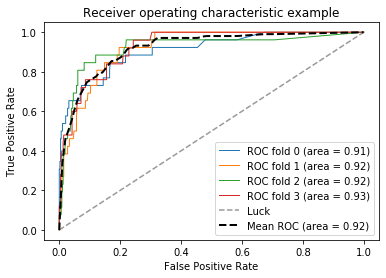

In [ ]:
# Run classifier with cross-validation and plot ROC curves
X=np.array(X_train)
y=np.array(y_train)
cv = StratifiedKFold(n_splits=4)
cv.get_n_splits(X, y)
# cv = StratifiedKFold(y, n_splits=4)
classifier = RandomForestClassifier(n_estimators=2000,max_depth=20,min_samples_leaf=1)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
count = 0
for i, (tran, tet) in enumerate(cv.split(X, y)):
    count+=1
    probas_ = classifier.fit(X[tran], y[tran]).predict_proba(X[tet])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[tet], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= count
#mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=1000)
ada_clf.fit(X_train, y_train)
print(cross_val_score(ada_clf, X_train, y_train, cv=4).mean())
ada_clf.score(X_train, y_train)

0.9438733712629679


1.0

Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)
print(cross_val_score(gb_clf, X_train, y_train, cv=4).mean())
gb_clf.score(X_train, y_train)

0.9423744126966526


1.0

Logistic Regression

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
print(cross_val_score(lr_clf,X_train,y_train,cv=4).mean())
lr_clf.score(X_train, y_train)

0.9468495578102875


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9468455042225534

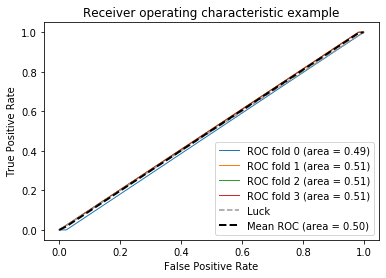

In [ ]:
# Run classifier with cross-validation and plot ROC curves
X=np.array(X_train)
y=np.array(y_train)
cv = StratifiedKFold(n_splits=4)
cv.get_n_splits(X, y)
# cv = StratifiedKFold(y, n_splits=4)
# classifier = RandomForestClassifier(n_estimators=2000,max_depth=20,min_samples_leaf=1)
lr_clf = SVC(gamma='auto', probability=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
count = 0
for i, (tran, tet) in enumerate(cv.split(X, y)):
    count+=1
    probas_ = lr_clf.fit(X[tran], y[tran]).predict_proba(X[tet])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[tet], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= count
#mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Logistic with CV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lrc_clf = LogisticRegressionCV(cv=5, random_state=0,
                            multi_class='multinomial').fit(X_train, y_train)
print(cross_val_score(lrc_clf,X_train,y_train,cv=4).mean())
lrc_clf.score(X_train, y_train)

0.9488336847944144


0.9488325881768505

SVM

In [ ]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

# >>> print(clf.predict([[-0.8, -1]]))
print(cross_val_score(svm_clf,X_train,y_train,cv=4).mean())
svm_clf.score(X_train, y_train)


0.9488336847944144


1.0

In [ ]:
# Run classifier with cross-validation and plot ROC curves
X=np.array(X_train)
y=np.array(y_train)
cv = StratifiedKFold(n_splits=4)
cv.get_n_splits(X, y)
# cv = StratifiedKFold(y, n_splits=4)
# classifier = RandomForestClassifier(n_estimators=2000,max_depth=20,min_samples_leaf=1)
svm_clf = SVC(gamma='auto', probability=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
count = 0
for i, (tran, tet) in enumerate(cv.split(X, y)):
    count+=1
    probas_ = svm_clf.fit(X[tran], y[tran]).predict_proba(X[tet])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[tet], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= count
#mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
print(cross_val_score(dt_clf,X_train,y_train,cv=4).mean())
dt_clf.score(X_train, y_train)


0.9384002222043695


1.0

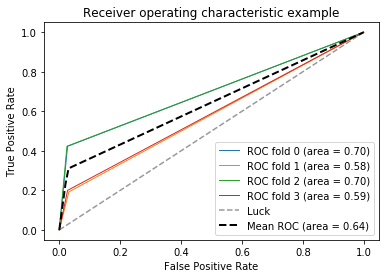

In [ ]:
# Run classifier with cross-validation and plot ROC curves
X=np.array(X_train)
y=np.array(y_train)
cv = StratifiedKFold(n_splits=4)
cv.get_n_splits(X, y)
# cv = StratifiedKFold(y, n_splits=4)
# classifier = RandomForestClassifier(n_estimators=2000,max_depth=20,min_samples_leaf=1)
dt_clf = DecisionTreeClassifier(random_state=0)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
count = 0
for i, (tran, tet) in enumerate(cv.split(X, y)):
    count+=1
    probas_ = dt_clf.fit(X[tran], y[tran]).predict_proba(X[tet])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[tet], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= count
#mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Feature Selection**

In [ ]:
print(X_train.columns.values)
print(test.columns.values)

['nbActions' 'meanTimeResponse' 'minTimeResponse' 'maxTimeResponse'
 'meanBidValue' 'minBidValue' 'maxBidValue' 'nbAuctionsPlayed'
 'nbOfAuctionWon' 'nbOfTriple' 'res0' 'res1' 'res2' 'res3' 'res4' 'res5'
 'fftPower0' 'fftPower1' 'fftPower2' 'fftPower3' 'fftPower4' 'fftPower5'
 'median' 'max' 'nbCountry' 'nbIp' 'nbUrl' 'actionFromMain' 'nbDevice'
 'jewelry' 'furniture' 'home goods' 'mobile' 'sporting goods'
 'office equipment' 'computers' 'books and music' 'clothing' 'auto parts']
['bidder_id' 'payment_account' 'address' 'nbActions' 'meanTimeResponse'
 'minTimeResponse' 'maxTimeResponse' 'meanBidValue' 'minBidValue'
 'maxBidValue' 'nbAuctionsPlayed' 'nbOfAuctionWon' 'nbOfTriple' 'res0'
 'res1' 'res2' 'res3' 'res4' 'res5' 'fftPower0' 'fftPower1' 'fftPower2'
 'fftPower3' 'fftPower4' 'fftPower5' 'median' 'max' 'nbCountry' 'nbIp'
 'nbUrl' 'actionFromMain' 'nbDevice' 'jewelry' 'furniture' 'home goods'
 'mobile' 'sporting goods' 'office equipment' 'computers'
 'books and music' 'clothing' 'au

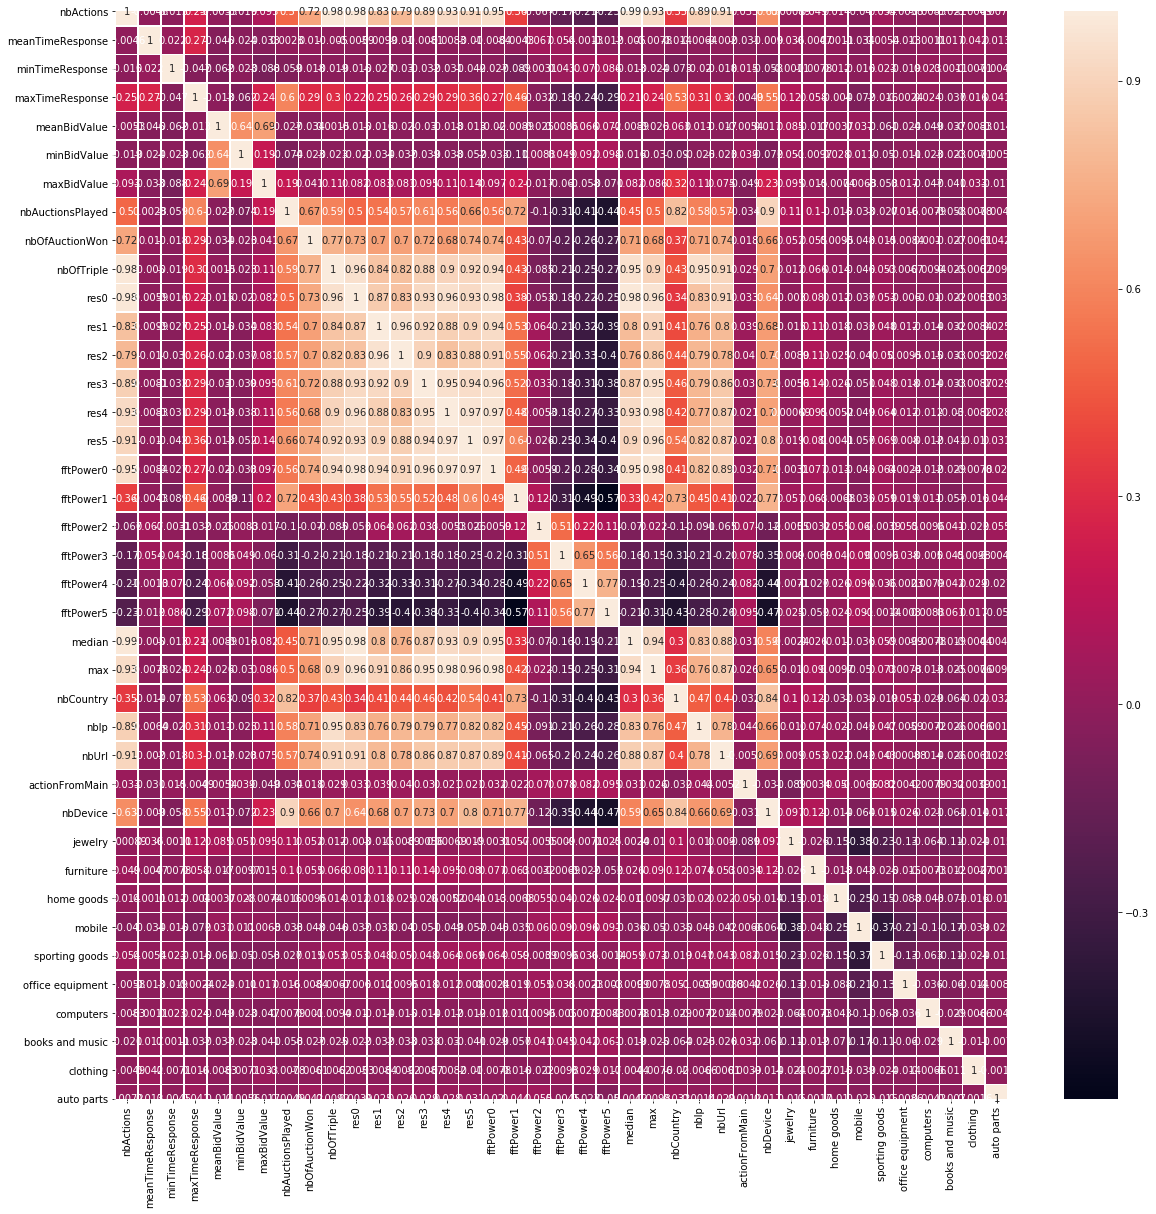

In [ ]:
#Heat map for correlation between columns
plt.figure(figsize=(20,20))
corr = X_train.corr(method='pearson')
sns.heatmap(corr, annot=True, linewidth=.50)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0326919  0.03139636 0.0134243  0.02453891 0.03548167 0.02041737
 0.02487718 0.02746394 0.02141846 0.02310955 0.04272512 0.03378241
 0.04025639 0.04614234 0.04423662 0.0512885  0.03553317 0.05635552
 0.02734637 0.02496504 0.02267989 0.03919932 0.02503497 0.02747168
 0.03427683 0.02751751 0.02567863 0.03789679 0.0321061  0.01555966
 0.0001075  0.00773055 0.01624741 0.01062839 0.00712348 0.01037123
 0.00291895 0.         0.        ]


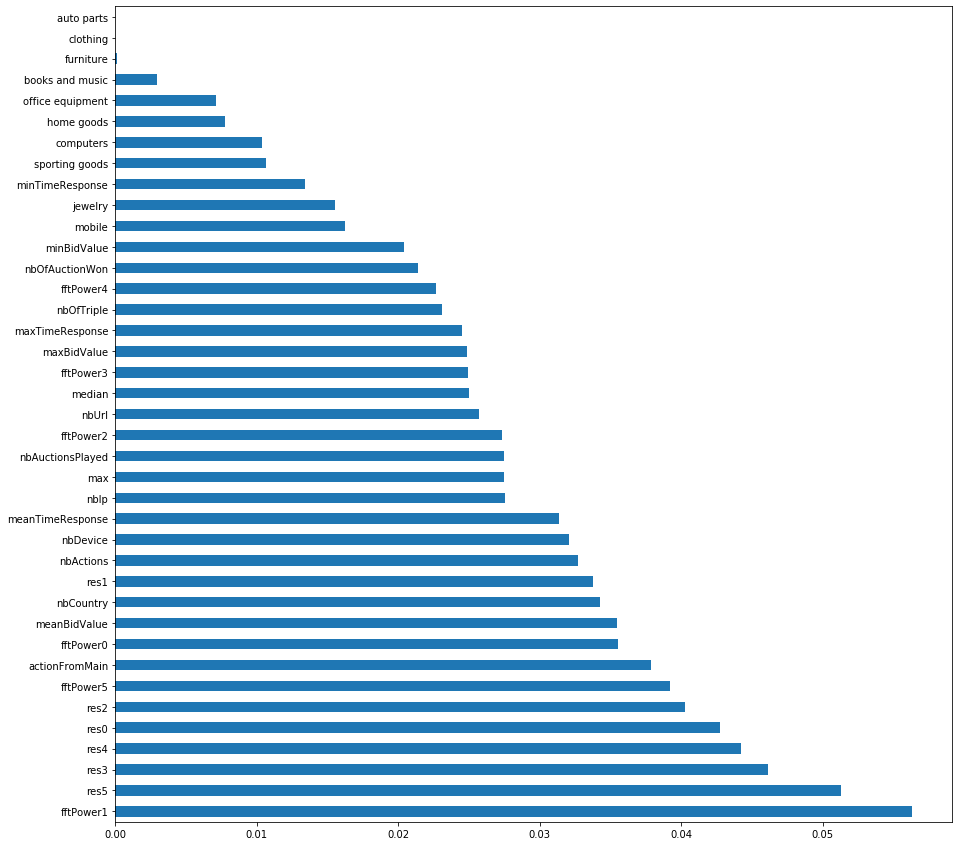

In [ ]:
#Importance of each feature with respect to target variable using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

plt.figure(figsize=(15,15))
print(model.feature_importances_) #using inbuilt class 'feature_importances' of tree based classifiers

#plot graph of feature importances for better visualization
feat_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(39).plot(kind='barh')
plt.show()

[3.16598888e-02 2.66815031e-02 3.37208627e-03 2.61933447e-02
 6.14578071e-02 1.42753028e-02 5.35851492e-02 2.82282982e-02
 1.20574579e-02 2.66631098e-02 4.21673860e-02 5.89151903e-02
 4.56047511e-02 4.32821118e-02 4.35789537e-02 3.76969233e-02
 5.12974943e-02 3.31618218e-02 2.53231671e-02 2.82476571e-02
 2.19487408e-02 2.62098817e-02 6.90787022e-03 2.81273485e-02
 2.63565433e-02 3.25806960e-02 3.75996607e-02 6.30312814e-02
 4.63480219e-02 3.41153591e-03 0.00000000e+00 3.32902850e-03
 3.70331776e-03 3.29739701e-03 7.48672429e-04 2.25223684e-03
 6.79047882e-04 0.00000000e+00 1.93145275e-05]


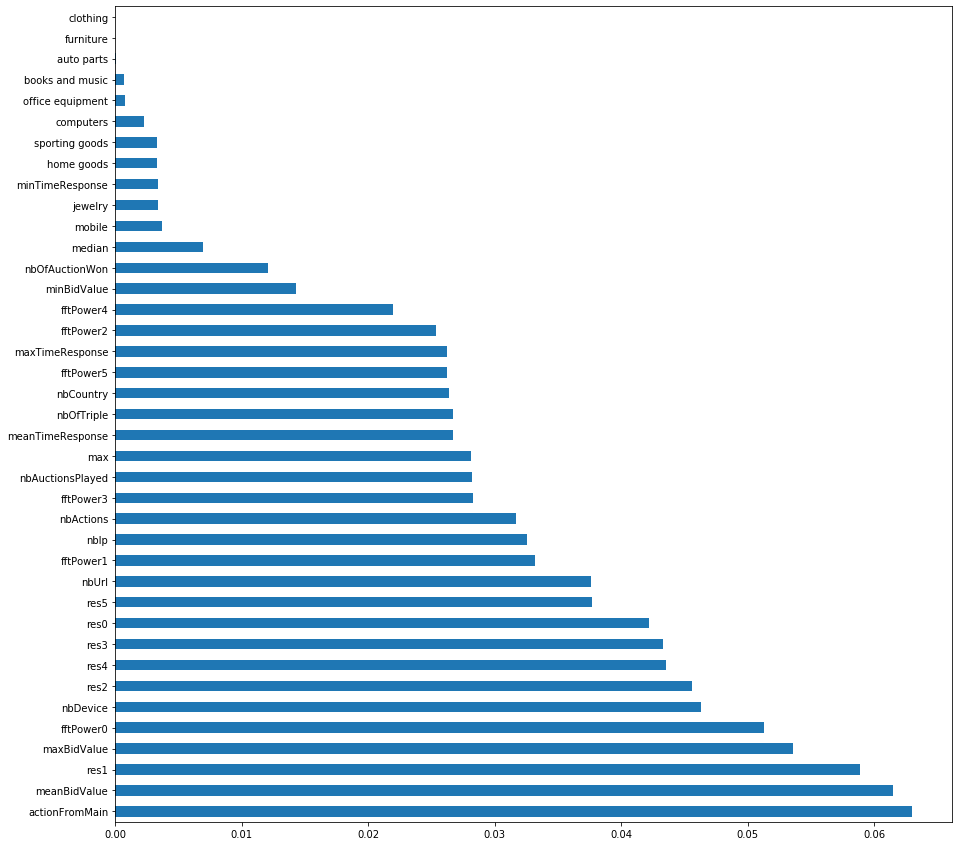

In [ ]:
#Importance of each feature with respect to target variable using ExtraTreesClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

plt.figure(figsize=(15,15))
print(model.feature_importances_) #using inbuilt class 'feature_importances' of tree based classifiers

#plot graph of feature importances for better visualization
feat_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(39).plot(kind='barh')
plt.show()

In [ ]:
rand = RandomForestClassifier(n_estimators=1000,max_depth=15,min_samples_leaf=2)
#rand = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
rand.fit(X_train[:1400],y_train[:1400])
# rand.fit(X_train,y_train)
prediction = rand.predict_proba(X_train[1400:])
prediction_train = rand.predict_proba(X_train[:1400])
print(rand.feature_importances_)
from sklearn import metrics
print(metrics.roc_auc_score(y_train[1400:], prediction[:,1]))

[3.54388100e-02 2.68462179e-02 3.27725830e-03 2.01842890e-02
 6.26685245e-02 1.83641093e-02 5.99927797e-02 2.77601120e-02
 1.09701869e-02 3.11444566e-02 4.12491974e-02 5.72512462e-02
 4.25276592e-02 3.79974100e-02 3.31492846e-02 3.61617671e-02
 4.26050710e-02 2.89138216e-02 3.33467671e-02 2.83897815e-02
 2.30713661e-02 3.03420591e-02 5.99711312e-03 3.21577900e-02
 2.92149968e-02 3.85073343e-02 3.05815815e-02 6.03660420e-02
 5.40157880e-02 1.93055032e-03 0.00000000e+00 2.46466622e-03
 3.91783056e-03 3.32695038e-03 1.84217349e-03 2.34664831e-03
 1.59600346e-03 0.00000000e+00 8.23567184e-05]
0.924506387921022


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

train_r = train#[train['nbActions']>100]

X_train = train_r.drop(['bidder_id','outcome','payment_account','address'],axis=1)
y_train = train_r['outcome']

X_test = test.drop(['bidder_id','payment_account','address'],axis=1)

**Flagged Data**

In [ ]:
bid_with_label = pd.merge(bid_data, train, on = "bidder_id")

In [ ]:
print(bid_with_label.shape)
bid_with_label.head()

(3071224, 12)


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
1,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
2,39,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
3,42,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
4,68,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0


In [ ]:
bid_with_label.drop(labels = ['payment_account', 'address'], axis=1, inplace=True)
bid_with_label.shape

(3071224, 10)

In [ ]:
bid_with_label['outcome'].value_counts()

0.0    2658808
1.0     412416
Name: outcome, dtype: int64

In [ ]:
pd.isnull(bid_with_label).any()

bid_id         False
bidder_id      False
auction        False
merchandise    False
device         False
time           False
country         True
ip             False
url            False
outcome        False
dtype: bool

In [ ]:
nobids_train = bid_with_label[pd.isnull(bid_with_label['bid_id'])]['bidder_id'].unique()
len(nobids_train)

0

In [ ]:
# check the missing value ratio of the country entry
print(pd.isnull(bid_with_label['country']).sum())
count_miss_ratio = pd.isnull(bid_with_label['country']).sum()/len(bid_with_label)*100
print(f" %0.2f %% observations missing country entry." %
      float(count_miss_ratio))



2701
 0.09 % observations missing country entry.


In [ ]:
bid_with_label['country'].fillna(bid_with_label['country'].mode()[0], inplace=True)

In [ ]:
print(pd.isnull(bid_with_label['country']).sum())
pd.isnull(bid_with_label).any()

0


bid_id         False
bidder_id      False
auction        False
merchandise    False
device         False
time           False
country        False
ip             False
url            False
outcome        False
dtype: bool